In [9]:
import numpy as np
from sklearn.cluster import SpectralClustering
import networkx as nx
import matplotlib.pyplot as plt


## Spectral Clustering vs K-means

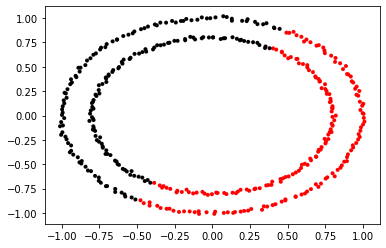

c:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


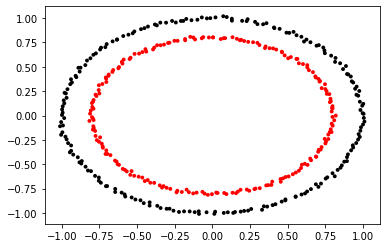

In [25]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.show()



## Cora Dataset

In [2]:
# Load dataset
adj = np.load('../data/raw/cora/adj.npy')
feat = np.load('../data/raw/cora/feat.npy')
label = np.load('../data/raw/cora/label.npy')
adj.shape, feat.shape, label.shape

((2708, 2708), (2708, 1433), (2708,))

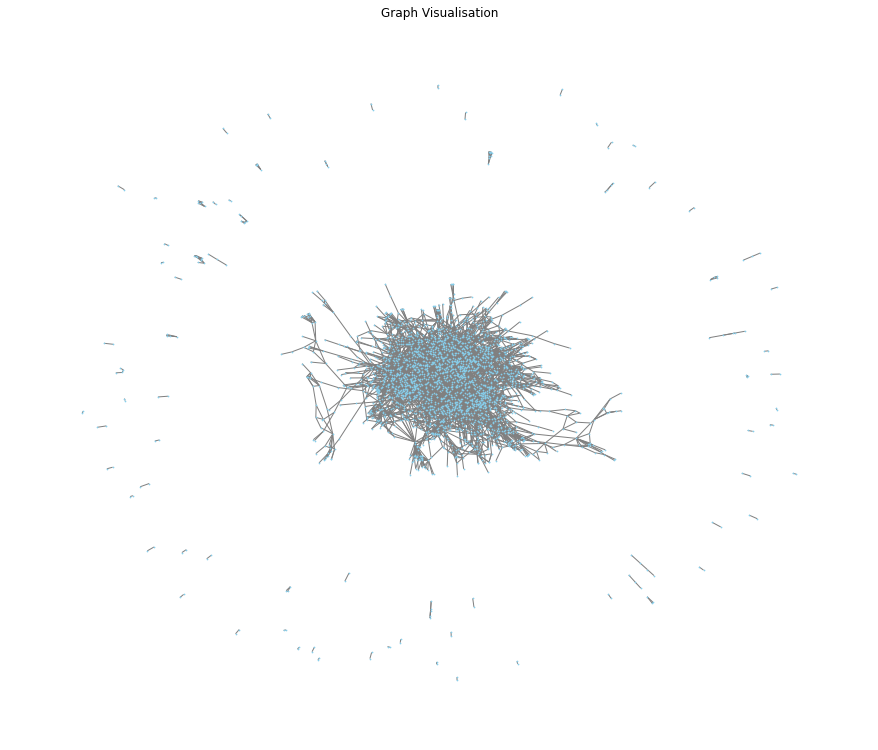

In [13]:
G = nx.from_numpy_array(adj)
# Visualiser le graphe
plt.figure(figsize=(12, 10))
nx.draw(G,  node_color='skyblue', node_size=0.5, edge_color='gray')
plt.title("Graph Visualisation")
plt.show()

In [16]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Charger la matrice d'adjacence à partir du fichier .npy
adj_matrix = adj

# Créer un objet Graph à partir de la matrice d'adjacence
G = nx.from_numpy_array(adj_matrix)

# Calculer la matrice Laplacienne normalisée du graphe
laplacian_matrix = nx.normalized_laplacian_matrix(G)

# Extraire les vecteurs propres de la matrice Laplacienne
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix.todense())

# Garder seulement les vecteurs propres correspondant aux k plus grandes valeurs propres
k = 7  # Nombre de clusters souhaités
idx = eigenvalues.argsort()[1:k+1]  # Exclure la première valeur propre (nulle)
k_eigenvectors = eigenvectors[:, idx]

# Effectuer le clustering spectral avec scikit-learn
spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', assign_labels='kmeans')
labels = spectral_clustering.fit_predict(nx.to_numpy_array(G))



c:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Exemple de calcul de l'indice de silhouette
silhouette = silhouette_score(nx.to_numpy_array(G), labels)

# Exemple de calcul du score de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(nx.to_numpy_array(G), labels)

# Exemple de calcul du score de Davies-Bouldin
davies_bouldin = davies_bouldin_score(nx.to_numpy_array(G), labels)

# Afficher les résultats
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


Silhouette Score: -0.2155213096047221
Calinski-Harabasz Score: 0.7592017227361169
Davies-Bouldin Score: 6.926109488836183
